In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\Ghassen Khaled\\Downloads\\invoices_data.csv")

In [3]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_invoice     10000 non-null  int64  
 1   issuedDate     10000 non-null  object 
 2   address        10000 non-null  object 
 3   company        10000 non-null  object 
 4   companyEmail   10000 non-null  object 
 5   country        10000 non-null  object 
 6   contact        10000 non-null  object 
 7   name           10000 non-null  object 
 8   service        10000 non-null  object 
 9   total          10000 non-null  float64
 10  discount       10000 non-null  float64
 11  tax            10000 non-null  float64
 12  invoiceStatus  10000 non-null  object 
 13  balance        10000 non-null  float64
 14  dueDate        10000 non-null  object 
 15  client         10000 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 1.2+ MB
None
        id_invoice         total

In [4]:
# Handle missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

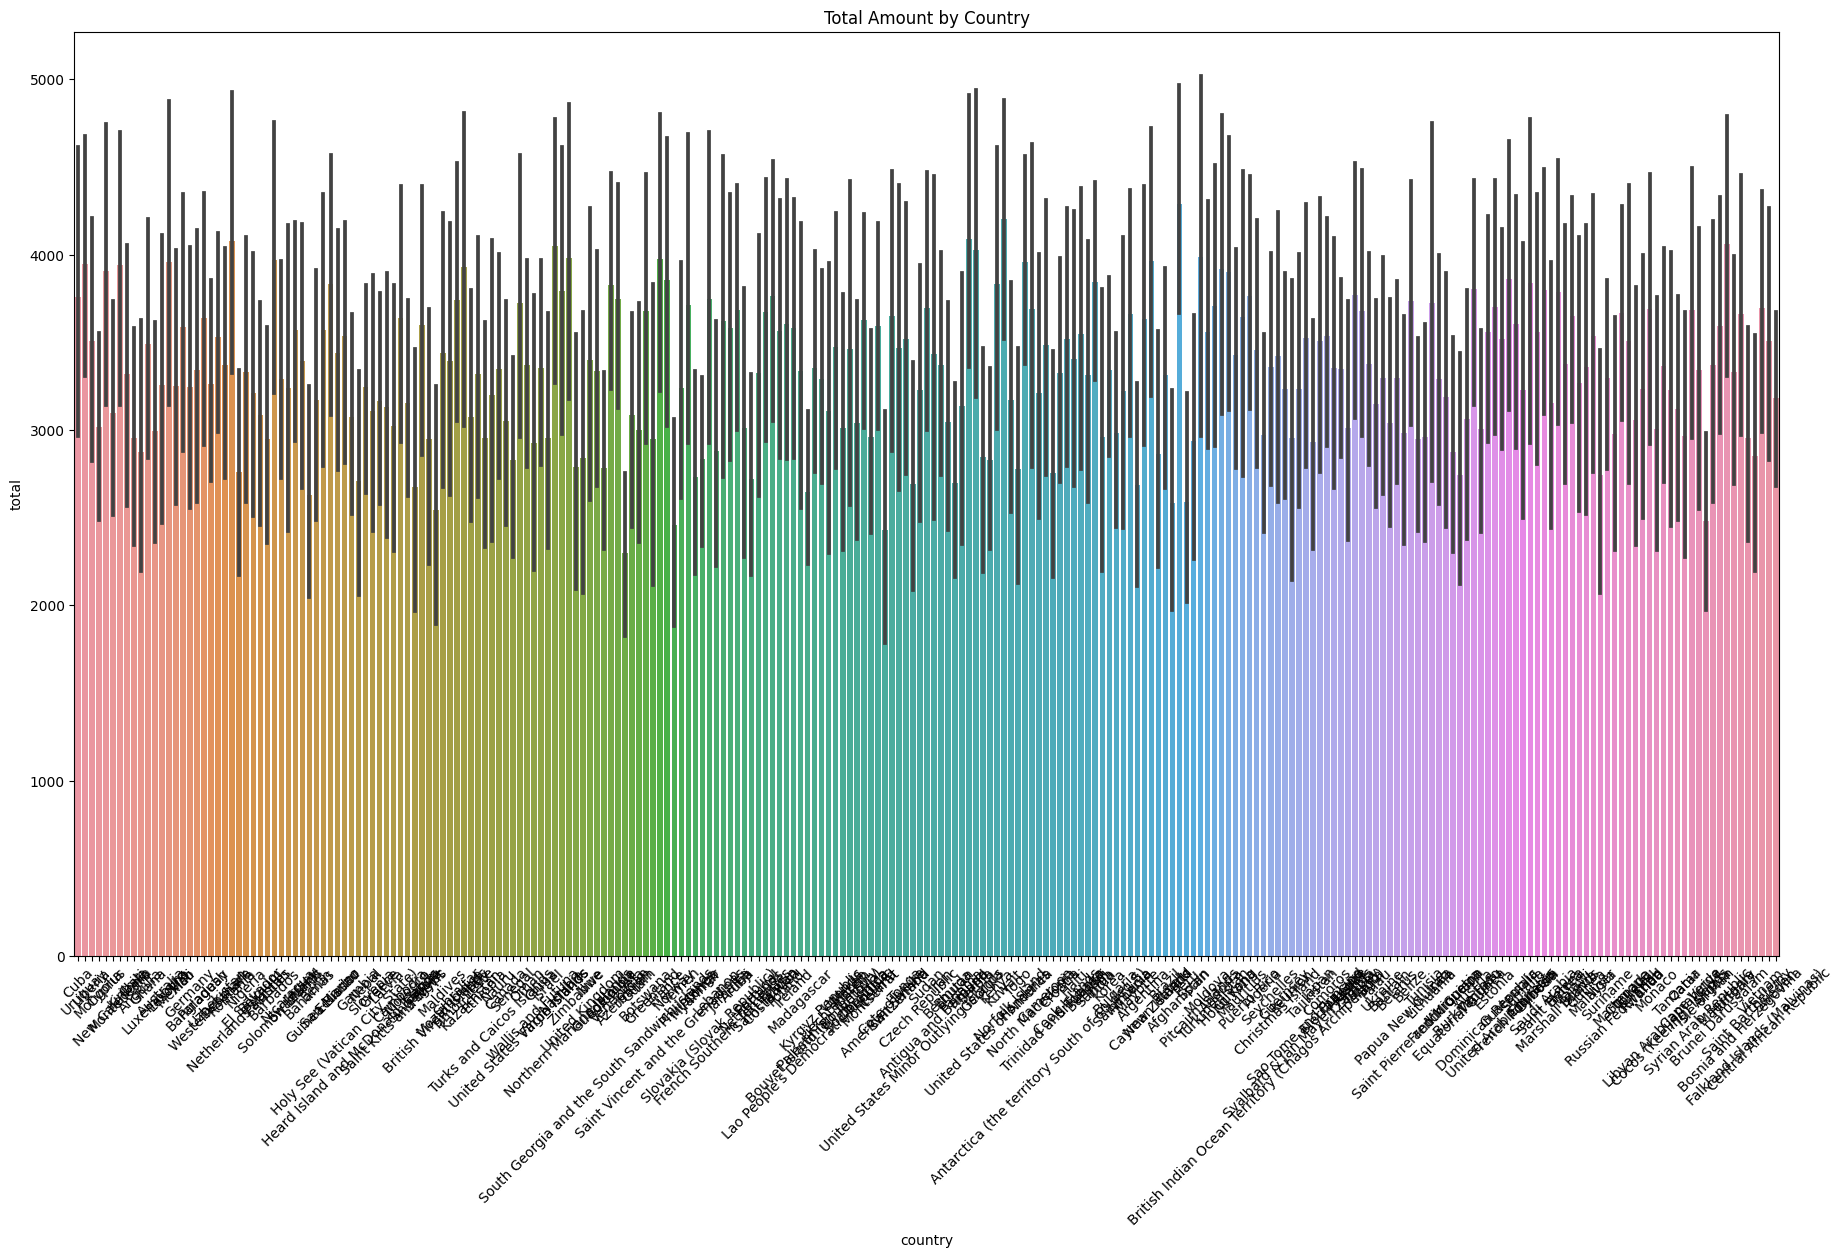

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot total amount by country
plt.figure(figsize=(22, 12))
sns.barplot(x="country", y="total", data=df)
plt.title("Total Amount by Country")
plt.xticks(rotation=45)
plt.show()

In [8]:
# Example: Extract year and month from issuedDate
df["issuedYear"] = pd.to_datetime(df["issuedDate"]).dt.year
df["issuedMonth"] = pd.to_datetime(df["issuedDate"]).dt.month

In [10]:
avg_total_by_service = df.groupby("service")["total"].mean()
avg_total_by_service

service
AI Solution               6538.730927
E-commerce Development    3021.218109
IoT Solution              4989.033193
Mobile App Development    3042.334663
UI/UX Design               604.287052
Web Development           1762.550006
Name: total, dtype: float64

In [11]:
top_clients = df.groupby("client")["total"].sum().sort_values(ascending=False).head(10)
print(top_clients)

client
Company C    6998999.02
Company B    6774232.38
Company E    6656673.24
Company A    6478227.83
Company D    6466007.22
Name: total, dtype: float64


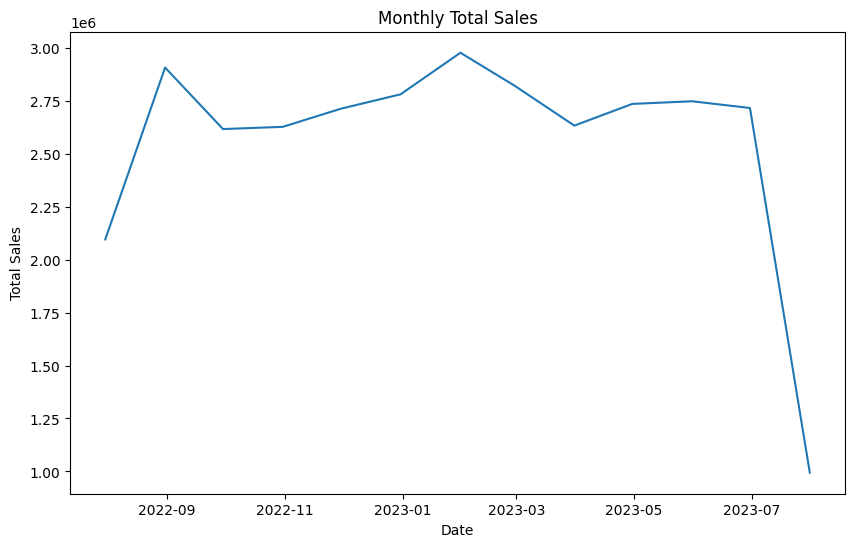

In [12]:
# Convert 'issuedDate' to datetime
df['issuedDate'] = pd.to_datetime(df['issuedDate'])

# Set 'issuedDate' as index for time series analysis
df.set_index('issuedDate', inplace=True)

# Resample data to monthly frequency and calculate total sales
monthly_sales = df['total'].resample('M').sum()

# Plot time series data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales)
plt.title('Monthly Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [13]:
# Invoice status distribution
invoice_status_counts = df['invoiceStatus'].value_counts()

# Average discount and tax by service type
avg_discount_by_service = df.groupby('service')['discount'].mean()
avg_tax_by_service = df.groupby('service')['tax'].mean()

# Identify top clients
top_clients = df.groupby('client')['total'].sum().nlargest(10)


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("C:\\Users\\Ghassen Khaled\\Downloads\\invoices_data.csv")

# Handle missing values (if any)
df.dropna(inplace=True)

# Split data into features (X) and target (y)
X = df.drop(columns=["total"])
y = df["total"]


In [16]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for encoding
categorical_columns = ["address", "company", "country", "invoiceStatus", "client"]

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_columns])

In [17]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ["discount", "tax", "balance"]

# Perform standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])


In [18]:
import numpy as np

X_final = np.hstack((X_encoded, X_scaled))


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 20.952964194853998
R-squared: 0.9999961344509415


In [22]:
# Example new data for prediction
new_data = pd.DataFrame({
    "address": ["New Address"],
    "company": ["New Company"],
    "country": ["New Country"],
    "invoiceStatus": ["Paid"],
    "client": ["New Client"],
    "discount": [0.1],
    "tax": [0.05],
    "balance": [1000]
})

# Preprocess new data similar to the training data
new_data_encoded = encoder.transform(new_data[categorical_columns])
new_data_scaled = scaler.transform(new_data[numerical_columns])
new_data_final = np.hstack((new_data_encoded, new_data_scaled))

# Make prediction
predicted_total = model.predict([new_data_final])
print("Predicted Total:", predicted_total)

ValueError: Found unknown categories ['New Address'] in column 0 during transform